# AE with DSA ( encoder != decoder)
______
## 1. 데이터 불러오기

In [1]:
import pandas as pd

df = pd.read_csv(r"C:\Users\DoHyeonjik\GachonUniv\3-2\datasets\DL\DSA_features.csv")
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022,basketBall,p8
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410,basketBall,p8
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438,basketBall,p8
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489,basketBall,p8


In [2]:
# 구조 보기
df.shape

(9120, 272)

In [3]:
# activity 특성의 클래스 확인
df['activity'].value_counts()

activity
sitting                    480
walkingTreadmillIncline    480
jumping                    480
rowing                     480
cyclingVertical            480
cyclingHorizontal          480
crossTrainer               480
stepper                    480
runningTreadmill           480
walkingTreadmillFlat       480
standing                   480
walkingLot                 480
movingInElevator           480
standingInElevatorStill    480
decendingStairs            480
ascendingStairs            480
lyingRigh                  480
lyingBack                  480
basketBall                 480
Name: count, dtype: int64

## 2. 데이터 전처리

In [5]:
lyingBack_df = df[df.activity == 'lyingBack']
lyingRigh_df = df[df.activity == 'lyingRigh']
runningTreadmill = df[df.activity == 'runningTreadmill']

normal_data = pd.concat([lyingBack_df, lyingRigh_df], axis=0)
abnormal_data = runningTreadmill

print(normal_data.shape)
print(abnormal_data.shape)

(960, 272)
(480, 272)


In [9]:
# 훈련 데이터는 normal 데이터만, test는 normal + abnormal
x_train = normal_data.drop(['people','activity'], axis=1)
x_test = pd.concat([normal_data, abnormal_data], axis=0)
y_test = x_test['activity']
x_test = x_test.drop(['people', 'activity'], axis=1)


print(x_train.shape, x_test.shape)
print(y_test.shape)

(960, 270) (1440, 270)
(1440,)


In [10]:
# 정규화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x_train)
train_scaled = ss.transform(x_train)
test_scaled = ss.transform(x_test)

## 3. 모델 생성
### 3-2) Encoder != Decoder

In [11]:
from tensorflow import keras
from keras.layers import Dense, Input
from keras.models import Model

input_dim = train_scaled.shape[1]

input_layer = Input(shape=(input_dim,))
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)
decoded = Dense(36, activation='relu')(encoded)
decoded = Dense(72, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

AE = Model(inputs = input_layer, outputs = decoded)
AE.compile(optimizer='adam', loss='mse')

AE.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 270)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          34,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 36)                  │           1,188 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 72)                  │           2,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 270)                 │          19,710 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 68,586 (267.91 KB)

 Trainable params: 68,586 (267.91 KB)

 Non-trainable params: 0 (0.00 B)

## 4. 학습

In [12]:
history = AE.fit(train_scaled, train_scaled, epochs=50, batch_size=256, validation_split=0.1, shuffle=True)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - loss: 1.2021 - val_loss: 0.8319
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.3678 - val_loss: 0.8181
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.1714 - val_loss: 0.7904
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.2538 - val_loss: 0.7460
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.1373 - val_loss: 0.6976
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.0481 - val_loss: 0.6653
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.9706 - val_loss: 0.6531
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.0770 - val_loss: 0.6532
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.9106 - val_loss: 0.6570
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.0767 - val_loss: 0.6587
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.0166 - val_loss: 0.6562
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9586 - val_loss: 0.6490
E

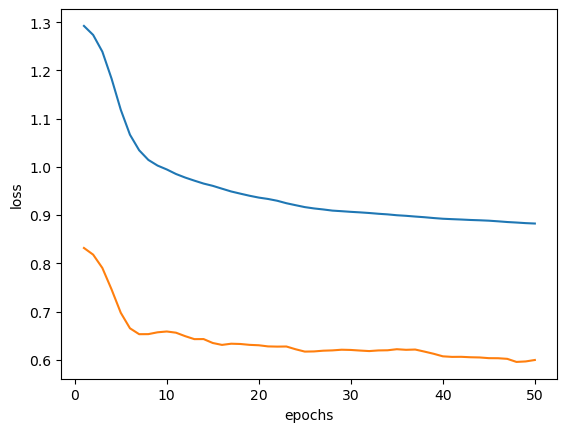

In [13]:
# loss 시각화
import matplotlib.pyplot as plt
epochs = range(1,51)
plt.plot(epochs, history.history['loss'], label = 'loss')
plt.plot(epochs, history.history['val_loss'], label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

## 5. reconstruction error 값을 이용한 이상치 탐지

In [26]:
# y_label 라벨인코딩
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_test_le = le.fit_transform(y_test)
print(le.classes_)
print(y_test_le)



['lyingBack' 'lyingRigh' 'runningTreadmill']
[0 0 0 ... 2 2 2]


In [27]:
import numpy as np

predictions = AE.predict(test_scaled)
mse = np.mean(np.power(test_scaled - predictions, 2), axis=1)
error_df2 = pd.DataFrame({"reconstruction_error": mse, "true_class":y_test_le})

error_df2.describe()

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step


,reconstruction_error,true_class
count,1.440000e+03,1440.00000
mean,1.203269e+06,1.00000
std,1.853079e+06,0.81678
min,1.451281e-01,0.00000
25%,3.270489e-01,0.00000
50%,5.195307e-01,1.00000
75%,2.727133e+06,2.00000
max,8.156985e+06,2.00000


In [28]:
# 잘못 정렬된 인덱스 조정
## 기존 DSA 데이터에서 불러오면서 생긴 index 때문에 lying은 1440번부터
## Running은 5280번 부터 인덱스가 매겨져있음
## 인덱스 shuffle 도 수행
error_df2 = error_df2.sample(frac=1).reset_index(drop=True)
error_df2.tail()

,reconstruction_error,true_class
1435,0.382163,1
1436,0.482699,0
1437,0.371938,1
1438,0.414028,1
1439,0.274239,0


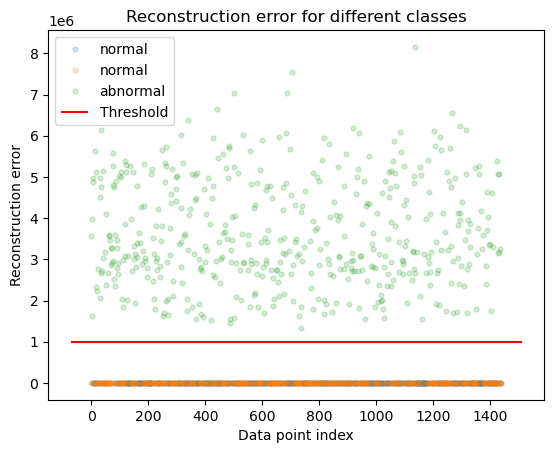

In [29]:
threshold=1e6-1

groups = error_df2.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms =3.5, linestyle='',alpha=0.2,
            label= "abnormal" if name == 2 else "normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label="Threshold")
ax.legend()
plt.title("Reconstruction error for different classes")
plt.xlabel("Data point index")
plt.ylabel("Reconstruction error")
plt.show()
          

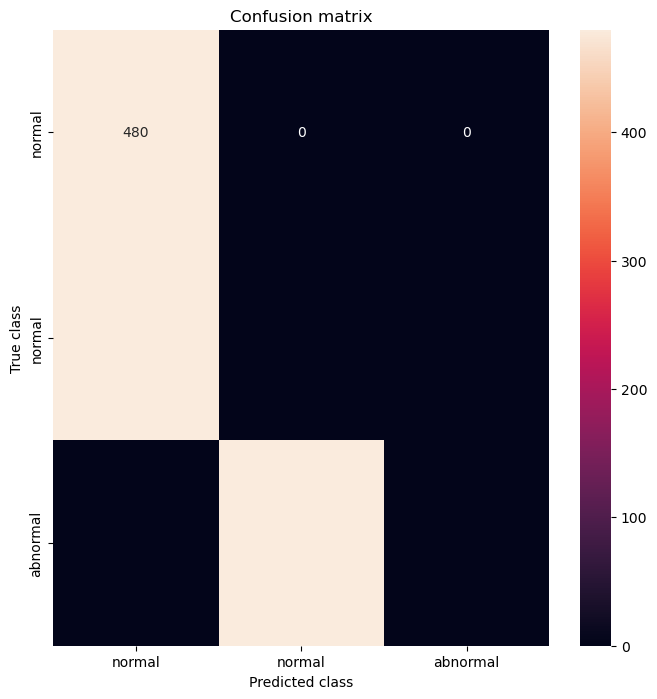

              precision    recall  f1-score   support

           0       0.50      1.00      0.67       480
           1       0.00      0.00      0.00       480
           2       0.00      0.00      0.00       480

    accuracy                           0.33      1440
   macro avg       0.17      0.33      0.22      1440
weighted avg       0.17      0.33      0.22      1440



C:\Users\DoHyeonjik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DoHyeonjik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DoHyeonjik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

LABELS = ['normal','normal','abnormal']

y_pred = [1 if e > threshold else 0 for e in error_df2.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df2.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df2.true_class, y_pred))